<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
a = tf.Variable(10.)
b = tf.Variable(20.)

In [3]:
print(a*b)

tf.Tensor(200.0, shape=(), dtype=float32)


In [4]:
print(a+b)

tf.Tensor(30.0, shape=(), dtype=float32)


In [5]:
print(tf.exp(a))

tf.Tensor(22026.465, shape=(), dtype=float32)


In [6]:
model = tf.keras.Model()


In [7]:
from tensorflow.python.keras.layers import Dense, Input, Add
from tensorflow.python.keras import Model
import numpy as np


In [8]:
x = np.ones((4,3)) 
dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(x)
print(f'Output: {output}')

Output: [[ 0.4146242 -1.1829798]
 [ 0.4146242 -1.1829798]
 [ 0.4146242 -1.1829798]
 [ 0.4146242 -1.1829798]]


In [9]:
w, b = dense_layer.get_weights()

print(f'Weights: {w}\nBias: {b}')

Weights: [[ 0.5064492   0.16715014]
 [-0.7479948  -0.49876595]
 [ 0.6561698  -0.851364  ]]
Bias: [0. 0.]


In [10]:
manual_output = np.matmul(x,w) + b
print(f'Manual output - {manual_output}')

Manual output - [[ 0.41462421 -1.18297982]
 [ 0.41462421 -1.18297982]
 [ 0.41462421 -1.18297982]
 [ 0.41462421 -1.18297982]]


### **Sequential Model**

In [11]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(20, activation='relu', 
                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(Dense(5,activation='softmax'))

In [12]:
sample_input = np.random.rand(2,10)
output = model(sample_input)
output

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.01319478, 0.12626204, 0.02189064, 0.16131741, 0.6773352 ],
       [0.01879492, 0.10072166, 0.02239256, 0.161587  , 0.6965039 ]],
      dtype=float32)>

In [13]:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (2, 10)                  110       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (2, 20)                  220       
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (2, 5)                   105       
 pper)                                                           
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


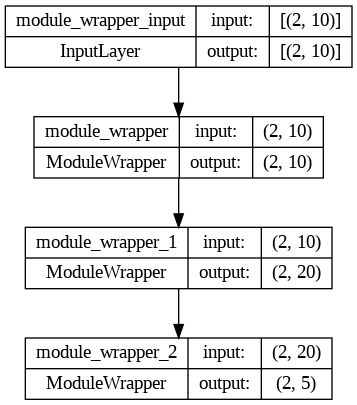

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

## **Functional** **API**

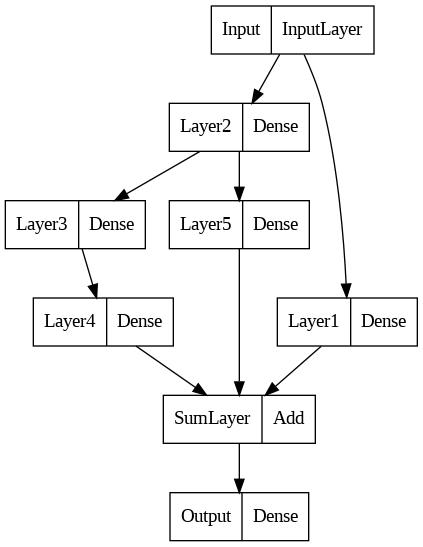

In [16]:
input_layer = Input(shape=(10, ), name='Input')

l1_output = Dense(10, name='Layer1')(input_layer)
l2_output = Dense(10, name='Layer2')(input_layer)
l3_output = Dense(10, name='Layer3')(l2_output)
l4_output = Dense(10, name='Layer4')(l3_output)
l5_output = Dense(10, name='Layer5')(l2_output)

sum_output = Add(name='SumLayer')([l1_output, l4_output, l5_output])
output = Dense(10, name='Output')(sum_output)

model = Model(inputs=input_layer, outputs=output)
tf.keras.utils.plot_model(model, show_shapes=False)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
Layer3 (Dense)                  (None, 10)           110         Layer2[0][0]                     
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         Input[0][0]                      
______________________________________________________________________________________________

In [18]:
import numpy as np


In [19]:
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

print(tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred))

tf.Tensor(0.24248708184951898, shape=(), dtype=float64)


In [20]:
print(np.mean((y_true - y_pred)**2))

0.24248708184951898


In [21]:
print(tf.keras.losses.binary_crossentropy(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)


In [22]:
loss = tf.keras.losses.BinaryCrossentropy()
print(loss(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)


# **Обучение модели в TF**

# Задача регрессии

In [23]:
celsius = np.array([-10,-40,10,20,36,5,-12,14,36]).astype(np.float32)
fahrengeit = np.array([14.,-40.,50.,68.,96.8,41.,10.4,57.2,96.8])

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

optimazer = tf.keras.optimizers.Adam(learning_rate=0.5)
loss = tf.keras.losses.MSE

In [25]:
model.compile(optimizer=optimazer, loss=loss)


In [26]:
history = model.fit(celsius,fahrengeit,epochs=200,verbose=2)

Epoch 1/200
1/1 - 0s - loss: 8115.9932 - 467ms/epoch - 467ms/step
Epoch 2/200
1/1 - 0s - loss: 6183.2329 - 7ms/epoch - 7ms/step
Epoch 3/200
1/1 - 0s - loss: 4554.2212 - 6ms/epoch - 6ms/step
Epoch 4/200
1/1 - 0s - loss: 3230.6963 - 6ms/epoch - 6ms/step
Epoch 5/200
1/1 - 0s - loss: 2208.7473 - 5ms/epoch - 5ms/step
Epoch 6/200
1/1 - 0s - loss: 1476.6624 - 5ms/epoch - 5ms/step
Epoch 7/200
1/1 - 0s - loss: 1012.7348 - 7ms/epoch - 7ms/step
Epoch 8/200
1/1 - 0s - loss: 783.4951 - 8ms/epoch - 8ms/step
Epoch 9/200
1/1 - 0s - loss: 743.4102 - 5ms/epoch - 5ms/step
Epoch 10/200
1/1 - 0s - loss: 837.2072 - 6ms/epoch - 6ms/step
Epoch 11/200
1/1 - 0s - loss: 1005.3151 - 6ms/epoch - 6ms/step
Epoch 12/200
1/1 - 0s - loss: 1191.5015 - 4ms/epoch - 4ms/step
Epoch 13/200
1/1 - 0s - loss: 1350.3302 - 8ms/epoch - 8ms/step
Epoch 14/200
1/1 - 0s - loss: 1451.9353 - 5ms/epoch - 5ms/step
Epoch 15/200
1/1 - 0s - loss: 1482.9670 - 4ms/epoch - 4ms/step
Epoch 16/200
1/1 - 0s - loss: 1444.3408 - 4ms/epoch - 4ms/step


In [27]:
model.get_weights()

[array([[1.7999531]], dtype=float32), array([32.011024], dtype=float32)]

In [28]:
import pandas as pd

history_df  = pd.DataFrame(history.history)
history_df

,loss
0,8115.993164
1,6183.232910
2,4554.221191
3,3230.696289
4,2208.747314
...,...
195,0.000155
196,0.000145
197,0.000137
198,0.000130


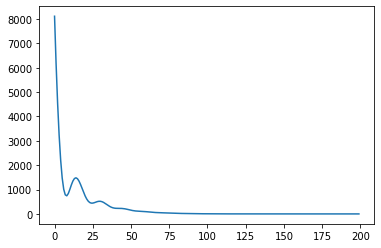

In [29]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss)

# Задача классификации

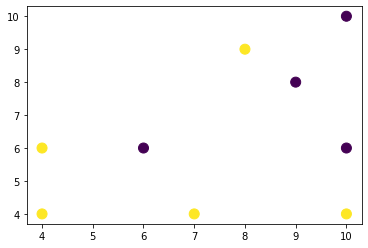

In [30]:
X = np.array([[10,6],[7,4],[6,6],[9,8],[10,10],[10,4],[4,4],[4,6],[8,9]])
y = np.array([0,1,0,0,0,1,1,1,1])
X[:,1]
plt.scatter(X[:,0],X[:,1],s=100, marker='o', c=y)

In [31]:
from tensorflow.python.keras.layers.core import activations
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)



In [32]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(X,y,epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6805 - accuracy: 0.4444 - 490ms/epoch - 490ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6674 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6631 - accuracy: 0.5556 - 7ms/epoch - 7ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6606 - accuracy: 0.5556 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6555 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6495 - accuracy: 0.6667 - 13ms/epoch - 13ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6446 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6400 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6350 - accuracy: 0.6667 - 6ms/epoch - 6ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6306 - accuracy: 0.6667 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6264 - accuracy: 0.6667 - 7ms/epoch - 7ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6217 - accuracy: 0.6667 - 8ms/epoch - 8ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6165 - accuracy: 0.6667

In [33]:
history_df_1 = pd.DataFrame(history.history)
history_df_1

,loss,accuracy
0,0.680529,0.444444
1,0.667389,0.444444
2,0.663052,0.555556
3,0.660589,0.555556
4,0.655482,0.666667
...,...,...
95,0.137206,1.000000
96,0.134413,1.000000
97,0.131692,1.000000
98,0.129040,1.000000


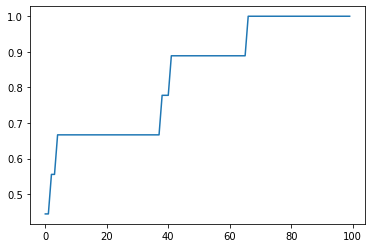

In [34]:
plt.plot(history_df_1.accuracy)

# **Практика**

In [35]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

# Задача 1

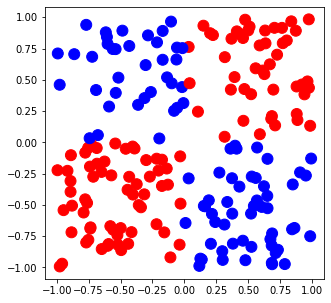

In [38]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [42]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.8066 - accuracy: 0.4350
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.5550
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5550
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5550
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5550
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5550
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5550
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5550
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5550
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5550
Epoch 11/200
4/4 [===========

7/7 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000
Perfect!


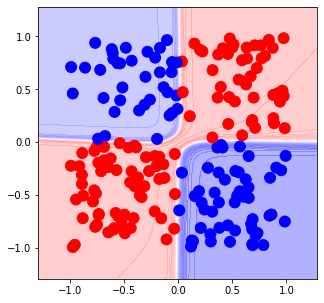

In [43]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

In [45]:
history_df_2 = pd.DataFrame(history.history)
history_df_2

,loss,accuracy
0,0.806606,0.435
1,0.702678,0.555
2,0.686417,0.555
3,0.690882,0.555
4,0.693726,0.555
...,...,...
195,0.008680,1.000
196,0.008541,1.000
197,0.008441,1.000
198,0.008350,1.000


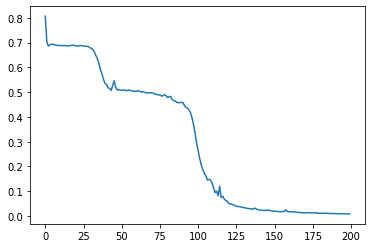

In [47]:
plt.plot(history_df_2.loss)

# Задача 2

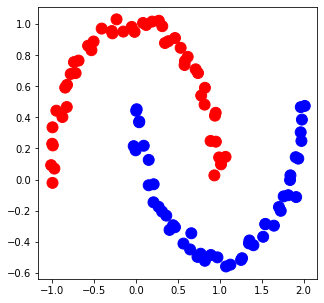

In [48]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [52]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(15, input_shape=(2,), activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [54]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 7ms/step - loss: 0.6132 - accuracy: 0.5800
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.8600
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.8500
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 0.3473 - accuracy: 0.8600
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.8600
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.2696 - accuracy: 0.8600
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.8600
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2596 - accuracy: 0.8700
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2623 - accuracy: 0.8600
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.8800
Epoch 11/200
2/2 [===========

4/4 [==============================] - 0s 3ms/step - loss: 8.9465e-06 - accuracy: 1.0000
Perfect!


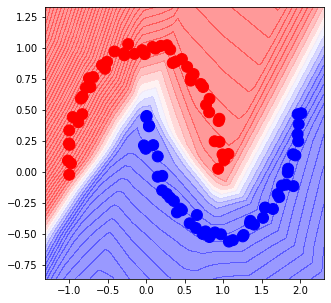

In [55]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

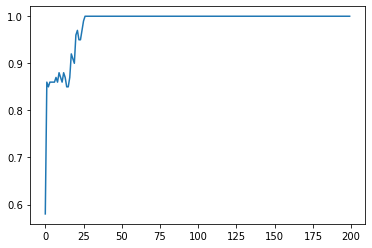

In [57]:
history_df_3 = pd.DataFrame(history.history)
plt.plot(history_df_3.accuracy)

# Задача 3

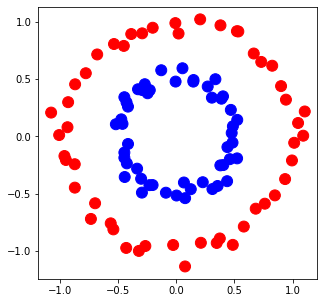

In [58]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="relu"))
#model.add(tf.keras.layers.Dense(2, activation="relu"))
#model.add(tf.keras.layers.Dense(3, activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [87]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6752 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 12ms/step - loss: 0.6525 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6427 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6199 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.5000
Epoch 11/200
2/2 [==========

4/4 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Perfect!
Bonus points!


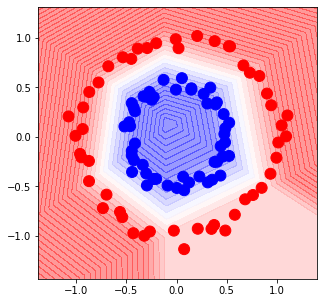

In [88]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

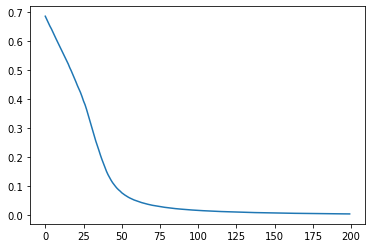

In [90]:
history_df_4 = pd.DataFrame(history.history)
plt.plot(history_df_4.loss)